# Task 1: Spacy Installation

In [22]:
from IPython.display import Image

In [23]:
image_path = 'a1.png'

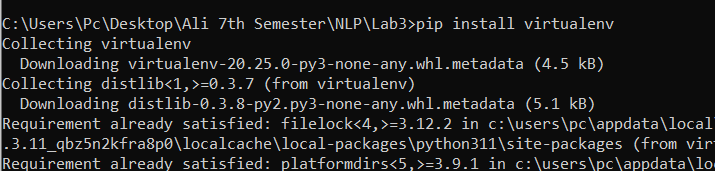

In [24]:
Image(filename=image_path)

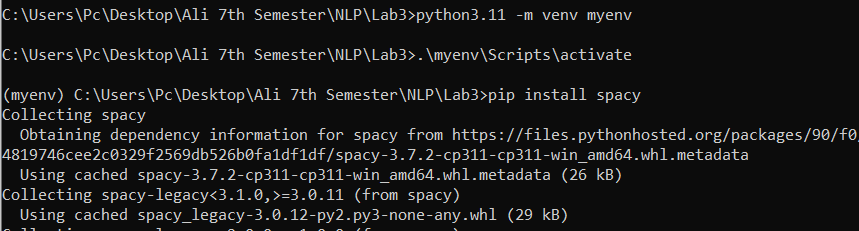

In [25]:
Image(filename='a2.png')

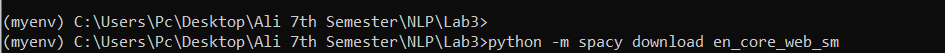

In [26]:
Image(filename='a3.png')

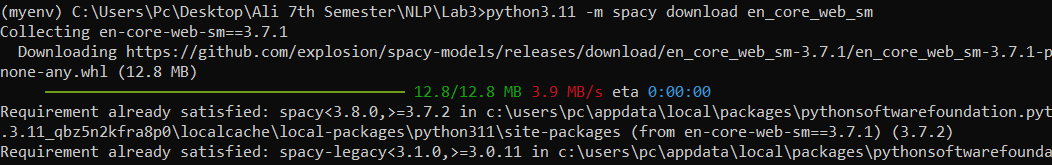

In [27]:
Image(filename='a4.png')

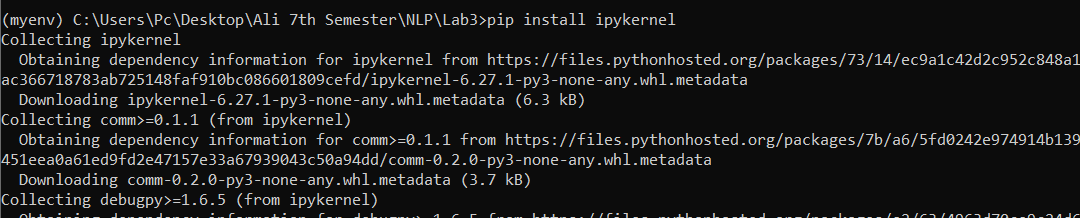

In [28]:
Image(filename='a6.png')

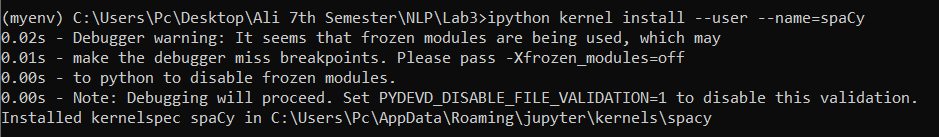

In [29]:
Image(filename='a7.png')

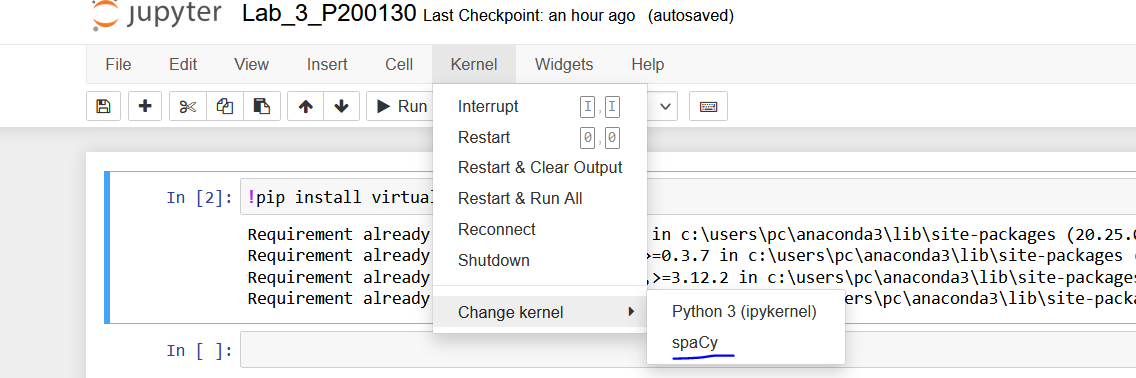

In [30]:
Image(filename='a8.png')

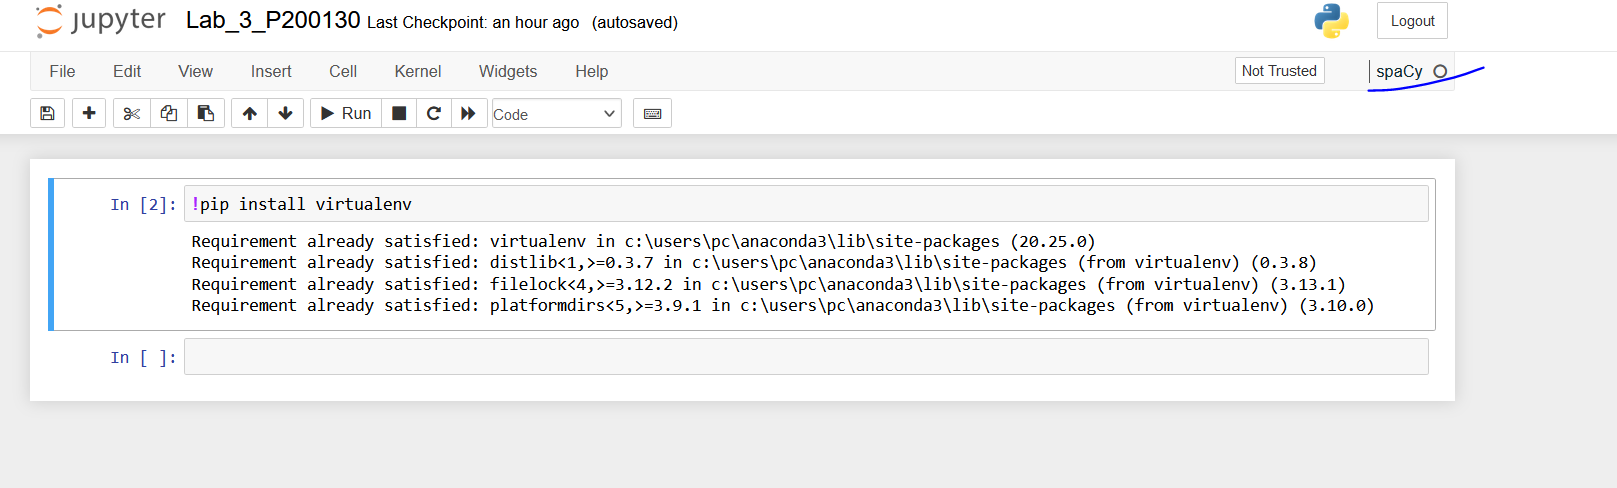

In [31]:
Image(filename='a9.png')

# Task 2: spaCy Hello World

In [32]:
from spacy.tokens.doc import Doc
from spacy.vocab import Vocab
doc = Doc(Vocab(), words = [u'Hello', u'World!'])
print(doc)


Hello World! 


In [33]:
print(type(doc))
print(doc.vocab)
for token in doc:
    lexeme = doc.vocab[token.text]
    print(lexeme.text)

<class 'spacy.tokens.doc.Doc'>
Hello
World!


# Q1. The Vocab() object belong to which class?


Answer: The Vocab() object belongs to the class spacy.vocab.Vocab

# Q2. What is a Lexeme object (You need to check the API)

Answer: A Lexeme object represents a word type in the vocabulary and is associated with a specific string of characters, along with various attributes such as orthographic properties, frequency, etc. In the provided context, the Lexeme objects are accessed using doc.vocab[token.text], where token.text is the text of each token in the document (Hello and World! in this case). Each Lexeme object is associated with a unique text string in the vocabulary.

In [14]:
!python3.11 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'I want to learn spaCy.')
token_text1 = [token.text for token in doc]
token_text2 = [doc[i].text for i in range(len(doc))]
print(token_text1)
print(token_text2)


['I', 'want', 'to', 'learn', 'spaCy', '.']
['I', 'want', 'to', 'learn', 'spaCy', '.']


# Q1: 1. What is en_core_web_sm?
Answer: en_core_web_sm is a spaCy model for processing English text. 
    It is a small English model trained on web data, which means it is faster and has a smaller size compared to larger models.



# Q2. What is the size of en_core_web_sm?
Answer: The size of en_core_web_sm can vary depending on the version.
    The Approximate size of en_core_web_sm is typically around 11 MB.
    
    
# Q3. What other variations can be used?
Answer: SpaCy provides models of different sizes for various use cases. Other variations of English models include:
    <br> 1)en_core_web_md: Medium-sized model.
    <br> 2)en_core_web_lg: Large-sized model.<br>
Additionally, spaCy supports models for other languages, and there are domain-specific models for tasks like biomedical text processing (en_ner_bc5cdr_md).


In [35]:
doc = nlp(u'I want to learn spaCy.')
for i in range(len(doc)):
    print([t for t in doc[i].lefts])


[]
[I]
[]
[to]
[]
[]


In [36]:
doc = nlp(u'I want to learn spaCy.')
for i in range(len(doc)):
    print([t for t in doc[i].rights])
    print([t for t in doc[i].children])

[]
[]
[learn, .]
[I, learn, .]
[]
[]
[spaCy]
[to, spaCy]
[]
[]
[]
[]


In [37]:
from spacy import displacy


In [38]:
displacy.render(doc, style='dep')


# 1. Draw the left and right dependencies for the sentence: I want to learn spaCy.

In [39]:
# Sentence 1: "I want to learn spaCy."
doc1 = nlp(u'I want to learn spaCy.')

In [40]:
for token in doc1:
    print(f"{token.text} <--left--- {', '.join([t.text for t in token.lefts])}")
    print(f"{token.text} ---right--> {', '.join([t.text for t in token.rights])}")


I <--left--- 
I ---right--> 
want <--left--- I
want ---right--> learn, .
to <--left--- 
to ---right--> 
learn <--left--- to
learn ---right--> spaCy
spaCy <--left--- 
spaCy ---right--> 
. <--left--- 
. ---right--> 


# 2. Draw the children for the sentence: I want to learn spaCy.

In [41]:
for token in doc1:
    print(f"{token.text} children: {[t.text for t in token.children]}")

I children: []
want children: ['I', 'learn', '.']
to children: []
learn children: ['to', 'spaCy']
spaCy children: []
. children: []


In [42]:
# Render the dependency tree
displacy.render(doc1, style='dep')

# 3. Draw the left and right dependencies for the sentence: I would very much want to eat a hot dinner.

In [43]:
# Sentence 2: "I would very much want to eat a hot dinner."
doc2 = nlp(u'I would very much want to eat a hot dinner.')

In [44]:
for token in doc2:
    print(f"{token.text} <--left--- {', '.join([t.text for t in token.lefts])}")
    print(f"{token.text} ---right--> {', '.join([t.text for t in token.rights])}")


I <--left--- 
I ---right--> 
would <--left--- 
would ---right--> 
very <--left--- 
very ---right--> 
much <--left--- very
much ---right--> 
want <--left--- I, would, much
want ---right--> eat, .
to <--left--- 
to ---right--> 
eat <--left--- to
eat ---right--> dinner
a <--left--- 
a ---right--> 
hot <--left--- 
hot ---right--> 
dinner <--left--- a, hot
dinner ---right--> 
. <--left--- 
. ---right--> 


# 4. Present a list of all dependency grammars of your sentences above

In [45]:
for token in doc2:
    print(f"{token.text} children: {[t.text for t in token.children]}")

I children: []
would children: []
very children: []
much children: ['very']
want children: ['I', 'would', 'much', 'eat', '.']
to children: []
eat children: ['to', 'dinner']
a children: []
hot children: []
dinner children: ['a', 'hot']
. children: []


In [46]:
# Render the dependency tree
displacy.render(doc2, style='dep')

# Task 3: NLTK vs spaCy Pipelines


In [47]:
import nltk

## Step 01: Take Raw Text

In [48]:
texts = [u"We are nearing the end of the semester at Peshawar. Final exams of the Fall 2023 semester will start soon."]

## Step 02: Do Sentence Level Segmentation

In [49]:
for text in texts:
    sentences = nltk.sent_tokenize(text)
    print(sentences)


['We are nearing the end of the semester at Peshawar.', 'Final exams of the Fall 2023 semester will start soon.']


## Step 03: Extract Tokens in Sentences

In [50]:
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(words)


['We', 'are', 'nearing', 'the', 'end', 'of', 'the', 'semester', 'at', 'Peshawar', '.']
['Final', 'exams', 'of', 'the', 'Fall', '2023', 'semester', 'will', 'start', 'soon', '.']


## Step 04: Perform Part of Speech Tagging


In [51]:
tagged_words = nltk.pos_tag(words)
print(tagged_words)


[('Final', 'JJ'), ('exams', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Fall', 'NN'), ('2023', 'CD'), ('semester', 'NN'), ('will', 'MD'), ('start', 'VB'), ('soon', 'RB'), ('.', '.')]


## Step 05: Detect Named Entity of Tagged Words

In [52]:
ne_tagged_words = nltk.ne_chunk(tagged_words)
print(ne_tagged_words)

(S
  Final/JJ
  exams/NN
  of/IN
  the/DT
  Fall/NN
  2023/CD
  semester/NN
  will/MD
  start/VB
  soon/RB
  ./.)


In [53]:
nltk.download('punkt') # Sentence Tokenize
nltk.download('averaged_perceptron_tagger') # POS Tagging
nltk.download('maxent_ne_chunker') # Named Entity Chunking
nltk.download('words') # Word Tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [55]:
from spacy import displacy
doc = nlp(u'We are nearing the end of the semester at Peshawar. Final exams of the Fall2023 semester will start soon.')
displacy.render(doc, style='ent')

In [56]:
for ent in doc.ents:
    print(ent.text, ent.label_)

the end of the semester DATE
Peshawar GPE
Fall2023 GPE


# 1. How did the Named Entity Output of the NLTK pipeline look like? Present its output.

In [57]:
print(ne_tagged_words)

(S
  Final/JJ
  exams/NN
  of/IN
  the/DT
  Fall/NN
  2023/CD
  semester/NN
  will/MD
  start/VB
  soon/RB
  ./.)


# 2. How did the Named Entity Output of the spaCy pipeline look like? Present its output.

In [59]:
for ent in doc.ents:
    print(ent.text, ent.label_)

the end of the semester DATE
Peshawar GPE
Fall2023 GPE


# 1. What is the default pipeline structure of spaCy? 

In [60]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [61]:
nlp = spacy.load('en_core_web_sm',disable=['parser'])

In [62]:
from spacy.language import Language
@Language.component("my_component")
def my_component(doc):
 # Do something to the doc here
 return doc

In [63]:
nlp.add_pipe("my_component")


<function __main__.my_component(doc)>

In [69]:
# Choose a unique name for your component
@Language.component("unique_component_name")
def my_component(doc):
    # Do something to the doc here
    return doc

# Add the component to the pipeline
nlp.add_pipe("unique_component_name", first=True)


<function __main__.my_component(doc)>

In [76]:
nlp.add_pipe("my_component", first=True)

In [71]:
nlp.add_pipe("my_component", last=True)

In [72]:
nlp.add_pipe("my_component", before="parser")

In [73]:
nlp.add_pipe("my_component", after="parser")

# Task 4: Finding Patterns in Sentences

In [77]:
doc = nlp(u'I want to learn spaCy.')
displacy.render(doc, style='dep')

C:\Users\Pc\anaconda3\Lib\site-packages\spacy\displacy\__init__.py:141: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  warnings.warn(Warnings.W005)


In [78]:
doc = nlp(u'How do I learn spaCy.')
displacy.render(doc, style='dep')


In [81]:
import spacy
nlp = spacy.load('en_core_web_sm')
def dep_pattern(doc):
    for i in range(len(doc)-1):
        print(doc[i].dep_)
        if doc[i].dep_ == 'nsubj' and doc[i+1].dep_ == 'ROOT' and doc[i+2].dep_ =='acomp':
             return True
    return False
doc = nlp(u'How do I learn spaCy.')
if dep_pattern(doc):
    print('Found')
else:
    print('Not found')

advmod
aux
nsubj
Found
